In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

In [2]:
#other useful imports we've seen before

import h5py
import numpy as np
import math
import os

In [3]:
#import scipy.stats package 
import scipy.stats as stats

In [55]:
#useful utility function for plotting HDF5 dimension labels
def dimnames(dataset):
    dims = dataset.dims  #get the dimension object
    dimlist = [x.label for x in dims.keys()]  #get the label attribute
    dimlist = map(str, dimlist)  #cast everything to string instead of "unicode" ... complicated rathole ... not strictly necessary
    return dimlist

## Correlation Analysis

In [54]:
#ok let's load the data mb
DATA_PATH = "/mnt/data3/yamins/visual/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH, mode='r')

In [21]:
#get the trial-averaged data
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]
Neural_Data.shape

(5760, 296)

In [22]:
#we can create subsets of the neural data corresponding to different columns -- e.g. different groups of neurons
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
print('V4 neural data shape is %d images X %d V4 neurons' % V4_Neural_Data.shape)

IT_Neural_Data = Neural_Data[:, IT_NEURONS]
print('IT neural data shape is %d images X %d IT neurons' % IT_Neural_Data.shape)


V4 neural data shape is 5760 images X 128 V4 neurons
IT neural data shape is 5760 images X 168 IT neurons


In [23]:
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

#now let's use what we just defined to create a dictionary whose keys are categories and whose values
#are arays of unique objects in each category
objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}

([<matplotlib.axis.YTick at 0x7f6890a588d0>,
 <a list of 8 Text yticklabel objects>)

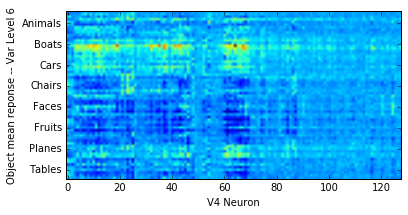

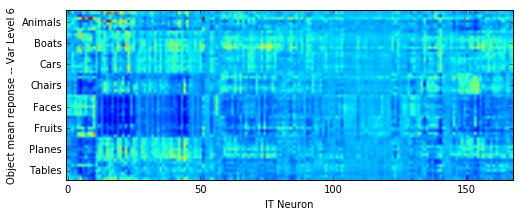

In [24]:
V4_object_means_by_category_var6 = np.row_stack([[V4_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

IT_object_means_by_category_var6 = np.row_stack([[IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])




plt.imshow(V4_object_means_by_category_var6)
plt.xlabel('V4 Neuron')
plt.ylabel('Object mean reponse -- Var Level 6')
plt.yticks(np.arange(0, 64, 8)+4, unique_categories)
plt.figure(figsize=(8,5))
plt.imshow(IT_object_means_by_category_var6)
plt.xlabel('IT Neuron')
plt.ylabel('Object mean reponse -- Var Level 6')
plt.yticks(np.arange(0, 64, 8)+4, unique_categories)

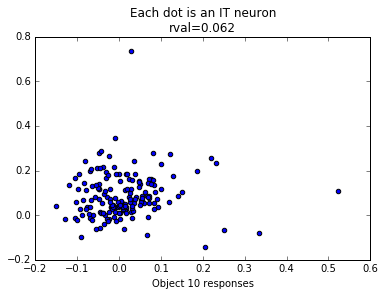

In [25]:
n1 = 0
n2 = 10
plt.scatter(IT_object_means_by_category_var6[n1], 
            IT_object_means_by_category_var6[n2])
plt.xlabel('Object %d responses' % n1)
plt.xlabel('Object %d responses' % n2)

rval = stats.pearsonr(IT_object_means_by_category_var6[n1], 
                     IT_object_means_by_category_var6[n2])[0]

plt.title('Each dot is an IT neuron\nrval=%.3f' % rval)

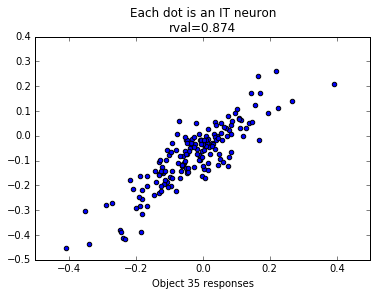

In [41]:
n1 = 32
n2 = 35
plt.scatter(IT_object_means_by_category_var6[n1], 
            IT_object_means_by_category_var6[n2])
plt.xlabel('Object %d responses' % n1)
plt.xlabel('Object %d responses' % n2)

rval = stats.pearsonr(IT_object_means_by_category_var6[n1], 
                     IT_object_means_by_category_var6[n2])[0]

plt.title('Each dot is an IT neuron\nrval=%.3f' % rval)

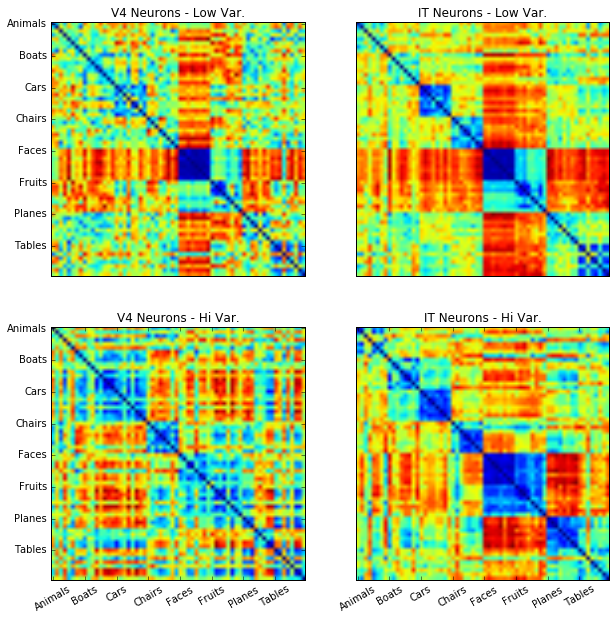

In [26]:
V4_object_means_by_category_var0 = np.row_stack([[V4_Neural_Data[(objects == o) & (var_level == 'V0')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

IT_object_means_by_category_var0 = np.row_stack([[IT_Neural_Data[(objects == o) & (var_level == 'V0')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])


V4_rdm_var0 = 1 - np.corrcoef(V4_object_means_by_category_var0)
IT_rdm_var0  = 1 - np.corrcoef(IT_object_means_by_category_var0)

V4_rdm_var6 = 1 - np.corrcoef(V4_object_means_by_category_var6)
IT_rdm_var6  = 1 - np.corrcoef(IT_object_means_by_category_var6)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('V4 Neurons - Low Var.')
plt.imshow(V4_rdm_var0)
plt.yticks(np.arange(0, 64, 8), unique_categories); plt.xticks([]);
plt.subplot(2, 2, 2)
plt.title('IT Neurons - Low Var.')
plt.imshow(IT_rdm_var0)
plt.gca().set_xticks([]); plt.xticks([]); plt.yticks([]); plt.xticks([]);
plt.subplot(2, 2, 3)
plt.title('V4 Neurons - Hi Var.')
plt.imshow(V4_rdm_var6)
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);
plt.subplot(2, 2, 4)
plt.title('IT Neurons - Hi Var.')
plt.imshow(IT_rdm_var6)
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30); plt.yticks([]);

In [27]:
#We'd like a control.   What about the images themselves?  After all, the 
#images are like a 256x256 = 65,536 dimensional representation. 

all_images = Ventral_Dataset['images']
all_images.dims.keys()

[<"image" dimension 0 of HDF5 dataset at 140086983439760>,
 <"height" dimension 1 of HDF5 dataset at 140086983439760>,
 <"width" dimension 2 of HDF5 dataset at 140086983439760>]

In [28]:
image_object_means_by_category_var0 = np.row_stack([[all_images[(objects == o) & (var_level == 'V0'), :, :].mean(0)
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

image_object_means_by_category_var6 = np.row_stack([[all_images[(objects == o) & (var_level == 'V6'), :, :].mean(0)
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

#see, these are arrays of shape (num_objects, height, width)
image_object_means_by_category_var6.shape

(64, 256, 256)

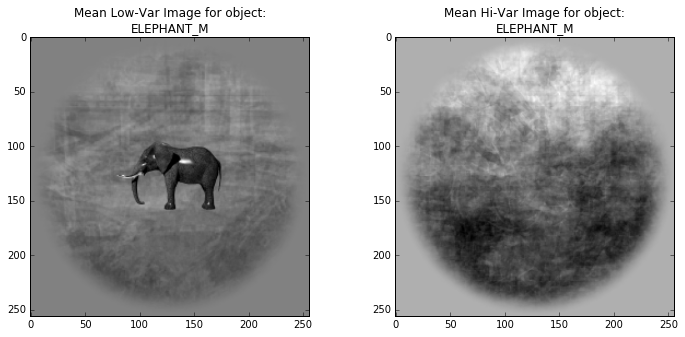

In [45]:
#just out of curiosity what do the mean images look like? 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_object_means_by_category_var0[0], cmap='gray')
plt.title('Mean Low-Var Image for object:\n%s' % objects_by_category['Animals'][0])

plt.subplot(1, 2, 2)
plt.imshow(image_object_means_by_category_var6[0], cmap='gray')
plt.title('Mean Hi-Var Image for object:\n%s' % objects_by_category['Animals'][0])

#so basically the pixel representation completely loses the object, on average, at high variation

In [29]:
#Gotta flatten out the two height width dimensions into 1:
image_object_means_by_category_var0_flat = image_object_means_by_category_var0.reshape((64, 256**2))
image_object_means_by_category_var6_flat = image_object_means_by_category_var6.reshape((64, 256**2))

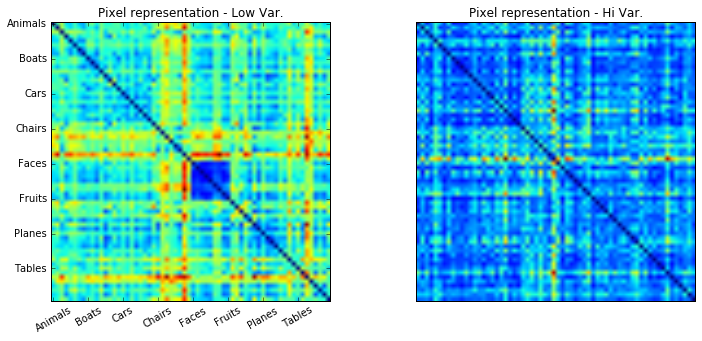

In [30]:
pixels_rdm_var0 = 1 - np.corrcoef(image_object_means_by_category_var0_flat)
pixels_rdm_var6 = 1 - np.corrcoef(image_object_means_by_category_var6_flat)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Pixel representation - Low Var.')
plt.imshow(pixels_rdm_var0)
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);

plt.subplot(1, 2, 2)
plt.title('Pixel representation - Hi Var.')
plt.imshow(pixels_rdm_var6)
plt.yticks([]); 
plt.xticks([]);

#interesting -- at low variation there is some structure -- especially, the faces stand out
#but at high variation basically everything is mush

### representation similarity analysis

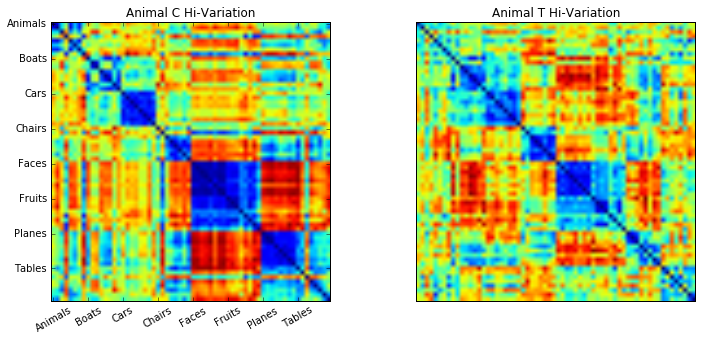

In [32]:
chabo = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Chabo'
chabo_IT_NEURONS = IT_NEURONS[chabo[IT_NEURONS]]
chabo_IT_Neural_Data = Neural_Data[:, chabo_IT_NEURONS]

chabo_IT_object_means_by_category_var6 = np.row_stack([[chabo_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

tito = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Tito'
tito_IT_NEURONS = IT_NEURONS[tito[IT_NEURONS]]
tito_IT_Neural_Data = Neural_Data[:, tito_IT_NEURONS]

tito_IT_object_means_by_category_var6 = np.row_stack([[tito_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_IT_rdm_var6  = 1 - np.corrcoef(chabo_IT_object_means_by_category_var6)
tito_IT_rdm_var6  = 1 - np.corrcoef(tito_IT_object_means_by_category_var6)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(chabo_IT_rdm_var6)
plt.title('Animal C Hi-Variation')
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);

plt.subplot(1, 2, 2)
plt.imshow(tito_IT_rdm_var6)
plt.title('Animal T Hi-Variation')
plt.yticks([]); plt.xticks([]); 

#similar between, but some notable differences -- Animal T seems "weaker" than Animal C!

In [33]:
#We need to take the upper right triangle (URT) of the RDMs for comparison purposes
from scipy.spatial.distance import squareform
V4_rdm_var0_flat = squareform(V4_rdm_var0, checks=False)
V4_rdm_var0_flat.shape
#see, the shape is 64 * 63 / 2 = 2016

V4_rdm_var6_flat = squareform(V4_rdm_var6, checks=False)
IT_rdm_var0_flat = squareform(IT_rdm_var0, checks=False)
IT_rdm_var6_flat = squareform(IT_rdm_var6, checks=False)
pixels_rdm_var0_flat = squareform(pixels_rdm_var0, checks=False)
pixels_rdm_var6_flat = squareform(pixels_rdm_var6, checks=False)

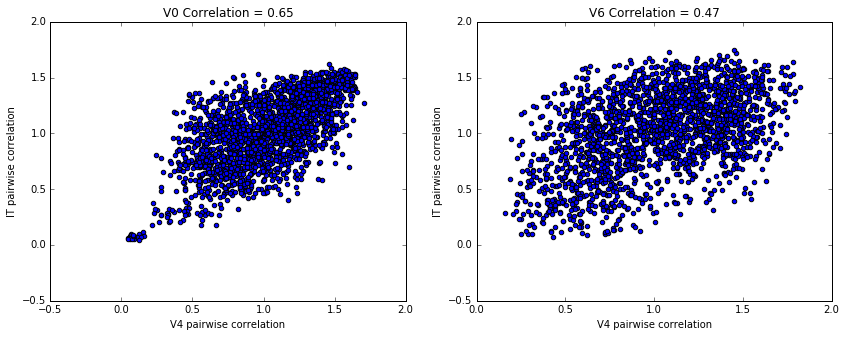

In [34]:
#now that we've got the URT, let's look at some comparisons, 
#first of IT vs V4 at low and high variation
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(V4_rdm_var0_flat, IT_rdm_var0_flat)
corrval_V0 = stats.pearsonr(V4_rdm_var0_flat, IT_rdm_var0_flat)[0]
plt.title('V0 Correlation = %.2f' % corrval_V0)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')


plt.subplot(1, 2, 2)
plt.scatter(V4_rdm_var6_flat, IT_rdm_var6_flat)
corrval_V6 = stats.pearsonr(V4_rdm_var6_flat, IT_rdm_var6_flat)[0]
plt.title('V6 Correlation = %.2f' % corrval_V6)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')

#if these numbers are to be believed, V4 and IT representations are more similar at low variation images
#than they are for high variation images. 

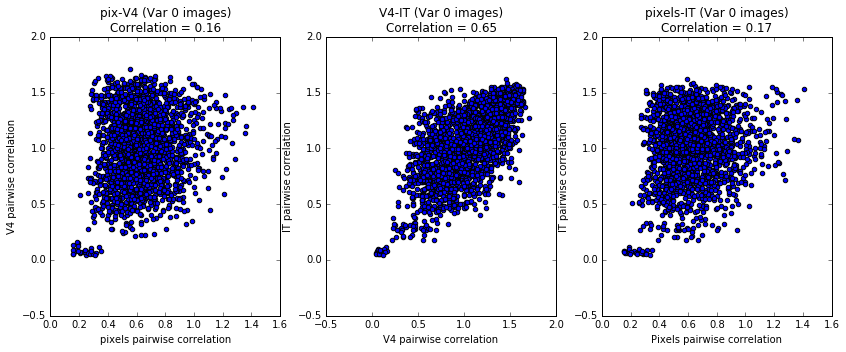

In [35]:
#now let's compare across pixels, V4 and IT 
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(pixels_rdm_var0_flat, V4_rdm_var0_flat)
corrval_pixV4 = stats.pearsonr(pixels_rdm_var0_flat, V4_rdm_var0_flat)[0]
plt.title('pix-V4 (Var 0 images)\nCorrelation = %.2f' % corrval_pixV4)
plt.xlabel('pixels pairwise correlation')
plt.ylabel('V4 pairwise correlation')

plt.subplot(1, 3, 2)
plt.scatter(V4_rdm_var0_flat, IT_rdm_var0_flat)
corrval_V4IT = stats.pearsonr(V4_rdm_var0_flat, IT_rdm_var0_flat)[0]
plt.title('V4-IT (Var 0 images)\nCorrelation = %.2f' % corrval_V4IT)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')

plt.subplot(1, 3, 3)
plt.scatter(pixels_rdm_var0_flat, IT_rdm_var0_flat)
corrval_pixIT = stats.pearsonr(pixels_rdm_var0_flat, IT_rdm_var0_flat)[0]
plt.title('pixels-IT (Var 0 images)\nCorrelation = %.2f' % corrval_pixIT)
plt.xlabel('Pixels pairwise correlation')
plt.ylabel('IT pairwise correlation')

#V4 representation looks much closer to IT than either does to the pixels

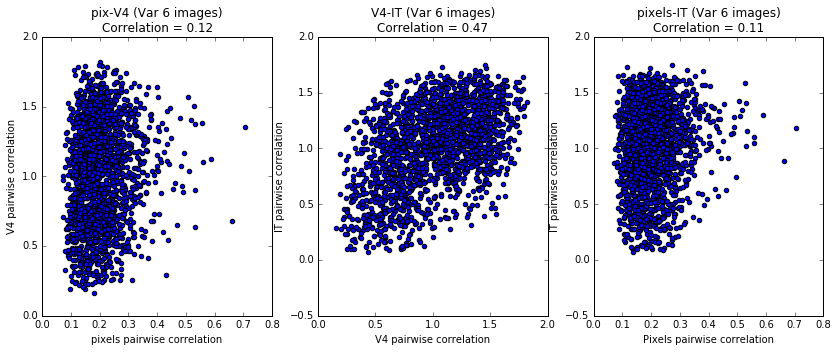

In [36]:
#And this result is especially true at high variation images
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(pixels_rdm_var6_flat, V4_rdm_var6_flat)
corrval_pixV4 = stats.pearsonr(pixels_rdm_var6_flat, V4_rdm_var6_flat)[0]
plt.title('pix-V4 (Var 6 images)\nCorrelation = %.2f' % corrval_pixV4)
plt.xlabel('pixels pairwise correlation')
plt.ylabel('V4 pairwise correlation')

plt.subplot(1, 3, 2)
plt.scatter(V4_rdm_var6_flat, IT_rdm_var6_flat)
corrval_V4IT = stats.pearsonr(V4_rdm_var6_flat, IT_rdm_var6_flat)[0]
plt.title('V4-IT (Var 6 images)\nCorrelation = %.2f' % corrval_V4IT)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')

plt.subplot(1, 3, 3)
plt.scatter(pixels_rdm_var6_flat, IT_rdm_var6_flat)
corrval_pixIT = stats.pearsonr(pixels_rdm_var6_flat, IT_rdm_var6_flat)[0]
plt.title('pixels-IT (Var 6 images)\nCorrelation = %.2f' % corrval_pixIT)
plt.xlabel('Pixels pairwise correlation')
plt.ylabel('IT pairwise correlation')



Cross-Animal Correlation= 0.55


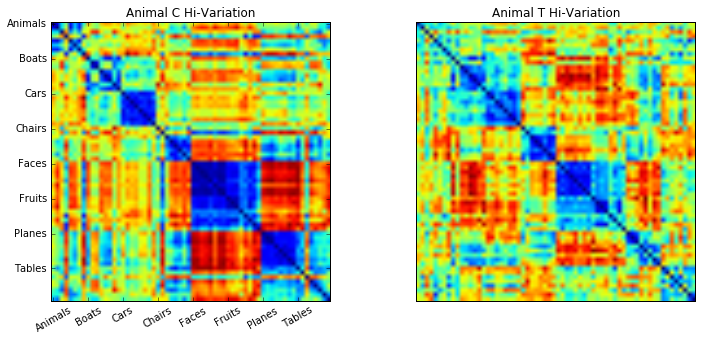

In [37]:
#but how close is V4 to IT? 
#well, actually let's compare to w/in animal controls

chabo = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Chabo'
chabo_IT_NEURONS = IT_NEURONS[chabo[IT_NEURONS]]
chabo_IT_Neural_Data = Neural_Data[:, chabo_IT_NEURONS]

chabo_IT_object_means_by_category_var6 = np.row_stack([[chabo_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

tito = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Tito'
tito_IT_NEURONS = IT_NEURONS[tito[IT_NEURONS]]
tito_IT_Neural_Data = Neural_Data[:, tito_IT_NEURONS]

tito_IT_object_means_by_category_var6 = np.row_stack([[tito_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_IT_rdm_var6  = 1 - np.corrcoef(chabo_IT_object_means_by_category_var6)
tito_IT_rdm_var6  = 1 - np.corrcoef(tito_IT_object_means_by_category_var6)

chabo_IT_rdm_var6_flat = squareform(chabo_IT_rdm_var6, checks=False)
tito_IT_rdm_var6_flat = squareform(tito_IT_rdm_var6, checks=False)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(chabo_IT_rdm_var6)
plt.title('Animal C Hi-Variation')
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);

plt.subplot(1, 2, 2)
plt.imshow(tito_IT_rdm_var6)
plt.title('Animal T Hi-Variation')
plt.yticks([]); plt.xticks([]); 

#similar between, but some notable differences -- Animal T seems "weaker" than Animal C!

ct_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
print('Cross-Animal Correlation= %.2f' % ct_corr)

In [54]:
#in fact, two animals' ITs are closer to each other -- but not by much than V4 overall is IT overall
#when pooled between the two animals.
ct_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
print('Cross-Animal Correlation= %.2f' % ct_corr)

corrval_V4IT = stats.pearsonr(V4_rdm_var6_flat, IT_rdm_var6_flat)[0]
print('V4-IT correlation = %.2f' % corrval_V4IT)

Cross-Animal Correlation= 0.55
V4-IT correlation = 0.47


In [38]:
#lets dig into this a little more and look at both animals separated by V4 and IT
tito_V4_NEURONS = V4_NEURONS[tito[V4_NEURONS]]
chabo_V4_NEURONS = V4_NEURONS[chabo[V4_NEURONS]]
tito_V4_Neural_Data = Neural_Data[:, tito_V4_NEURONS]
chabo_V4_Neural_Data = Neural_Data[:, chabo_V4_NEURONS]

tito_V4_object_means_by_category_var6 = np.row_stack([[tito_V4_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_V4_object_means_by_category_var6 = np.row_stack([[chabo_V4_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_V4_rdm_var6_flat  = squareform(1 - np.corrcoef(chabo_V4_object_means_by_category_var6), checks=False)
tito_V4_rdm_var6_flat  = squareform(1 - np.corrcoef(tito_V4_object_means_by_category_var6), checks=False)

In [39]:
#ok let's compute all the pairwise distances between areas per animal
#there are 4 animal-areas (two animals x two areas), so there are choose(4, 2) = 6 unique pairwise distances
chaboIT_titoIT_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
chaboV4_titoV4_corr = stats.pearsonr(chabo_V4_rdm_var6_flat, tito_V4_rdm_var6_flat)[0]
chaboIT_titoV4_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_V4_rdm_var6_flat)[0]
chaboV4_titoIT_corr = stats.pearsonr(chabo_V4_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
chaboV4_chaboIT_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, chabo_V4_rdm_var6_flat)[0]
titoV4_titoIT_corr = stats.pearsonr(tito_IT_rdm_var6_flat, tito_V4_rdm_var6_flat)[0]

print('Animal C IT / Animal T IT Correlation= %.2f' % chaboIT_titoIT_corr)
print('Animal C V4 / Animal T V4 Correlation= %.2f' % chaboV4_titoV4_corr)
print('Animal C IT / Animal T V4 Correlation= %.2f' % chaboIT_titoV4_corr)
print('Animal C V4 / Animal T IT Correlation= %.2f' % chaboV4_titoIT_corr)
print('Animal C V4 / Animal C IT Correlation= %.2f' % chaboV4_chaboIT_corr)
print('Animal T V4 / Animal T IT Correlation= %.2f' % titoV4_titoIT_corr)

#let's make a distance matrix of them in whatever order
#say ... titoV4 chaboV4 titoIT chaboIT
distmat = 1 - np.array([[1, chaboV4_titoV4_corr, titoV4_titoIT_corr, chaboIT_titoV4_corr],
                        [chaboV4_titoV4_corr, 1, chaboV4_titoIT_corr, chaboV4_chaboIT_corr],
                        [titoV4_titoIT_corr, chaboV4_titoIT_corr, 1, chaboIT_titoIT_corr],
                        [chaboIT_titoV4_corr, chaboV4_chaboIT_corr, chaboIT_titoIT_corr, 1]])

Animal C IT / Animal T IT Correlation= 0.55
Animal C V4 / Animal T V4 Correlation= 0.68
Animal C IT / Animal T V4 Correlation= 0.45
Animal C V4 / Animal T IT Correlation= 0.58
Animal C V4 / Animal C IT Correlation= 0.31
Animal T V4 / Animal T IT Correlation= 0.69


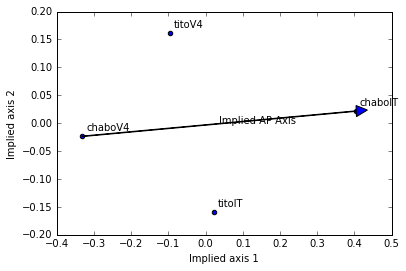

In [40]:
#Ok, let's visualize what we got.  Have 4 points (4 animal-areas) but really to 
#want to look at them in 2 dimensions.  How? Let's use multi-dimensional scaling

from sklearn.manifold import MDS
x, y = MDS(dissimilarity='precomputed').fit_transform(distmat).T
plt.scatter(x, y)
labels = ['titoV4', 'chaboV4', 'titoIT', 'chaboIT']
for i in range(4):
    plt.annotate(labels[i], (x[i], y[i]), (x[i]+.01, y[i]+.01))
plt.xlabel('Implied axis 1')
plt.ylabel('Implied axis 2')

plt.arrow(x[1], y[1], x[3] - x[1], y[3]-y[1])
plt.text(x[1] + (x[3] - x[1]) / 2, y[1] + (y[3] - y[1]) / 2, 'Implied AP Axis')

#Conclusion:  The "IT" arrays in animal T are probably more posterior than they are in animal C.  
#             (While the V4 arrays are pretty close between the two animals.)
#             So we can perhaps think of Animal C's IT array as the "truly" IT-like area.  
#background:  Yes, that can be seen to be true from surgerical notes. 

plt.savefig('tito_chabo.pdf')

## Another example

In [230]:
#Let's explore the Self-Regulation Ontology data a bit

In [229]:
ls /mnt/data3/yamins/Self_Regulation_Ontology

annotations/            Makefile
batch_files/            misc_scripts/
cross_decomposition/    ontology_mapping/
Data/                   pilot_expanalysis_scripts/
data_preparation/       prediction_analyses/
demographic_analyses/   README.md
dimensional_structure/  references/
discovery_analyses/     replication/
docker2singularity.sh   requirements1.txt
Dockerfile              requirements2.txt
docs/                   Results/
environment.yml         retest_analyses/
experiment_notes.txt    selfregulation/
graph_analysis/         Self_Regulation_Settings_example.txt
individual_structure/   setup.py
item_selection/         survey_items_analyses/


In [65]:
ls /mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019/

alcohol_drugs.csv
alcohol_drugs_ordinal.csv
demographic_health.csv
demographics.csv
demographics_ordinal.csv
DV_valence.csv
health.csv
health_ordinal.csv
Individual_Measures/
items.csv.gz
meaningful_variables_clean.csv
meaningful_variables.csv
meaningful_variables_EZ.csv
meaningful_variables_hddm.csv
meaningful_variables_imputed.csv
meaningful_variables_imputed_for_task_selection.csv
meaningful_variables_noDDM.csv
metadata/
README.txt
references/
short_DV_valence.csv
short_meaningful_variables_clean.csv
short_meaningful_variables.csv
short_meaningful_variables_EZ.csv
short_meaningful_variables_hddm.csv
short_meaningful_variables_imputed.csv
short_meaningful_variables_imputed_for_task_selection.csv
short_meaningful_variables_noDDM.csv
short_subject_x_items.csv
short_taskdata_clean.csv
short_taskdata.csv
short_taskdata_imputed.csv
short_taskdata_imputed_for_task_selection.csv
short_variables_exhaustive.csv
subject_x_items.csv
taskdata_clean.csv
taskdata.csv
taskdata_imputed.csv
taskdata_

In [231]:
#what does the readme tell us?

In [66]:
cat /mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019/README.txt

demographics_survey.csv: demographic information from expfactory-surveys

alcohol_drug_survey.csv: alcohol, smoking, marijuana and other drugs from expfactory-surveys

ky_survey.csv: mental health and neurological/health conditions from expfactory-surveys

items.csv.gz: gzipped csv of all item information across surveys

subject_x_items.csv: reshaped items.csv such that rows are subjects and columns are individual items

Individual Measures: directory containing gzip compressed files for each individual measures

DV_valence.csv: Subjective assessment of whether each variable's 'natural' direction implies 'better' self regulation

variables_exhaustive.csv: all variables calculated for each measure

meaningful_variables_noDDM.csv: subset of exhaustive data to only meaningful variables with DDM parameters removed

meaningful_variables_EZ.csv: subset of exhaustive data to only meaningful variables with rt/acc parameters removed (replaced by EZ DDM params)

meaningful_variables_hddm.csv: su

In [ ]:
#ok so probably we want to look at the survey data 

In [67]:
import pandas as pd

In [236]:
sro_path = '/mnt/data3/yamins/Self_Regulation_Ontology/Data/Complete_02-16-2019/'


In [237]:
datapath = os.path.join(sro_path,
                        'meaningful_variables_imputed.csv')
df = pd.read_csv(datapath, index_col=0)

In [238]:
taskdatapath = os.path.join(sro_path,
                            'taskdata_imputed.csv')
taskdf = pd.read_csv(taskdatapath, index_col=0)

In [106]:
list(taskdf.columns)

['adaptive_n_back.hddm_drift',
 'adaptive_n_back.hddm_drift_load',
 'adaptive_n_back.hddm_non_decision',
 'adaptive_n_back.hddm_thresh',
 'adaptive_n_back.mean_load.logTr',
 'angling_risk_task_always_sunny.keep_adjusted_clicks',
 'angling_risk_task_always_sunny.keep_coef_of_variation',
 'angling_risk_task_always_sunny.release_adjusted_clicks',
 'angling_risk_task_always_sunny.release_coef_of_variation.logTr',
 'attention_network_task.alerting_hddm_drift',
 'attention_network_task.conflict_hddm_drift.ReflogTr',
 'attention_network_task.hddm_drift',
 'attention_network_task.hddm_non_decision.ReflogTr',
 'attention_network_task.hddm_thresh',
 'attention_network_task.orienting_hddm_drift',
 'bickel_titrator.hyp_discount_rate_large.logTr',
 'bickel_titrator.hyp_discount_rate_medium.logTr',
 'bickel_titrator.hyp_discount_rate_small.logTr',
 'choice_reaction_time.hddm_drift',
 'choice_reaction_time.hddm_non_decision.logTr',
 'choice_reaction_time.hddm_thresh',
 'cognitive_reflection_survey.co

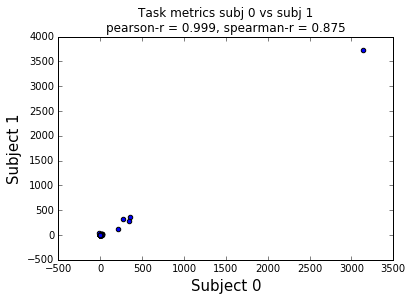

In [224]:
i0 = 0
i1 = 1
s0 = taskdf.iloc[i0]
s1 = taskdf.iloc[i1]
plt.scatter(s0, s1)
pearsonr = stats.pearsonr(s0, s1)[0]
spearmanr = stats.spearmanr(s0, s1)[0]
plt.xlabel('Subject %d' % i0, fontsize=15)
plt.ylabel('Subject %d' % i1, fontsize=15)
plt.title('Task metrics subj %d vs subj %d\npearson-r = %.3f, spearman-r = %.3f' % (i0, i1, pearsonr, spearmanr))

In [102]:
(s0 > 2500).nonzero()[0]

array([123])

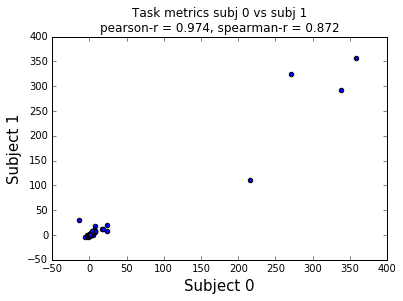

In [226]:
keep = (s0 < 2500)

i0 = 0
i1 = 1
s0 = taskdf.iloc[i0][keep]
s1 = taskdf.iloc[i1][keep]
plt.scatter(s0, s1)
pearsonr = stats.pearsonr(s0, s1)[0]
spearmanr = stats.spearmanr(s0, s1)[0]
plt.xlabel('Subject %d' % i0, fontsize=15)
plt.ylabel('Subject %d' % i1, fontsize=15)
plt.title('Task metrics subj %d vs subj %d\npearson-r = %.3f, spearman-r = %.3f' % (i0, i1, pearsonr, spearmanr))

In [109]:
N = len(df)
N

522

In [179]:
task_corrmat = stats.spearmanr(taskdf, axis=1).correlation

In [180]:
task_corrmat.shape

(522, 522)

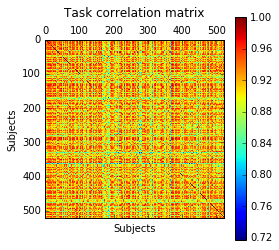

In [219]:
plt.colorbar(plt.matshow(task_corrmat))
plt.xlabel("Subjects")
plt.ylabel('Subjects')
plt.title('Task correlation matrix', y=1.1)

In [126]:
from sklearn.cluster import AffinityPropagation

In [199]:
model = AffinityPropagation(preference=0, 
                            affinity='precomputed')
task_clusters = model.fit_predict(task_corrmat)
task_clusters

array([2, 3, 1, 1, 1, 3, 4, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1, 4, 3,
       4, 1, 1, 2, 3, 1, 0, 2, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 4,
       4, 1, 2, 1, 0, 1, 0, 4, 3, 1, 1, 2, 2, 3, 2, 1, 0, 3, 2, 3, 3, 1,
       3, 3, 3, 4, 2, 3, 3, 1, 1, 4, 2, 3, 3, 1, 4, 2, 1, 1, 2, 1, 1, 4,
       3, 0, 2, 4, 0, 2, 1, 2, 0, 3, 3, 3, 4, 1, 1, 3, 2, 3, 0, 3, 1, 2,
       2, 2, 0, 3, 4, 1, 4, 3, 3, 3, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 4, 3, 3, 1, 3, 3, 4, 1, 3, 1, 4, 1, 3, 1, 1, 2, 1,
       3, 3, 3, 1, 1, 4, 3, 2, 3, 1, 1, 2, 4, 1, 1, 3, 4, 1, 0, 2, 1, 3,
       2, 1, 1, 3, 2, 2, 2, 4, 0, 1, 3, 2, 1, 3, 3, 4, 1, 3, 1, 1, 3, 3,
       1, 3, 2, 3, 1, 1, 0, 1, 3, 3, 2, 3, 3, 2, 1, 4, 3, 1, 3, 1, 3, 1,
       4, 1, 3, 3, 4, 3, 1, 0, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 3, 1, 3, 3,
       4, 4, 0, 4, 1, 3, 0, 3, 2, 1, 3, 1, 3, 0, 1, 1, 2, 3, 3, 3, 1, 3,
       3, 2, 1, 3, 3, 3, 2, 1, 1, 3, 4, 1, 2, 1, 3, 4, 0, 0, 3, 4, 3, 3,
       2, 1, 3, 2, 1, 2, 2, 1, 0, 3, 1, 1, 1, 1, 1,

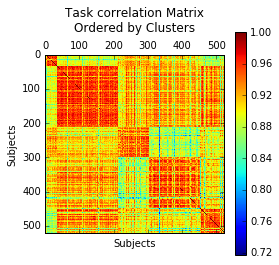

In [214]:
task_ordering = task_clusters.argsort()
task_corrmat_ordered = task_corrmat[task_ordering][:, task_ordering]
plt.colorbar(plt.matshow(task_corrmat_ordered))
plt.xlabel('Subjects')
plt.ylabel('Subjects')
plt.title('Task correlation Matrix\nOrdered by Clusters', y=1.1)

In [166]:
survey_variables = [x for x in df.columns if 'survey' in x]

In [167]:
survey_variables

['bis11_survey.Attentional',
 'bis11_survey.Motor.logTr',
 'bis11_survey.Nonplanning',
 'bis_bas_survey.BAS_drive',
 'bis_bas_survey.BAS_fun_seeking',
 'bis_bas_survey.BAS_reward_responsiveness',
 'bis_bas_survey.BIS',
 'brief_self_control_survey.self_control',
 'cognitive_reflection_survey.correct_proportion',
 'cognitive_reflection_survey.intuitive_proportion',
 'dickman_survey.functional',
 'dospert_eb_survey.ethical',
 'dospert_eb_survey.financial',
 'dospert_eb_survey.health_safety.logTr',
 'dospert_eb_survey.recreational',
 'dospert_eb_survey.social',
 'dospert_rp_survey.ethical',
 'dospert_rp_survey.financial',
 'dospert_rp_survey.health_safety',
 'dospert_rp_survey.recreational',
 'dospert_rp_survey.social',
 'dospert_rt_survey.ethical',
 'dospert_rt_survey.financial',
 'dospert_rt_survey.health_safety',
 'dospert_rt_survey.recreational',
 'dospert_rt_survey.social',
 'eating_survey.cognitive_restraint',
 'eating_survey.emotional_eating',
 'eating_survey.uncontrolled_eating',
 

In [168]:
survey_df = df[survey_variables]
survey_corrmat = stats.spearmanr(survey_df, axis=1).correlation

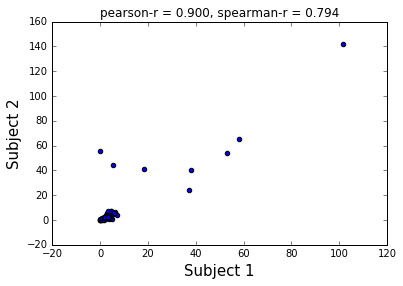

In [171]:
i0 = 0
i1 = 10
s0 = survey_df.iloc[i0]
s1 = survey_df.iloc[i1]
plt.scatter(s0, s1)
pearsonr = stats.pearsonr(s0, s1)[0]
spearmanr = stats.spearmanr(s0, s1)[0]
plt.xlabel('Subject 1', fontsize=15)
plt.ylabel('Subject 2', fontsize=15)
plt.title('pearson-r = %.3f, spearman-r = %.3f' % (pearsonr, spearmanr))

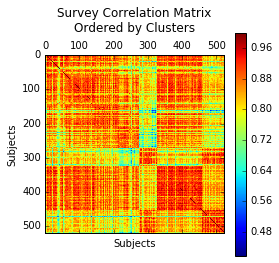

In [215]:
model = AffinityPropagation(preference=0, 
                            affinity='precomputed')
survey_clusters = model.fit_predict(survey_corrmat)
survey_ordering = survey_clusters.argsort()
survey_corrmat_ordered = survey_corrmat[survey_ordering][:, survey_ordering]
plt.colorbar(plt.matshow(survey_corrmat_ordered))
plt.xlabel('Subjects')
plt.ylabel('Subjects')
plt.title('Survey Correlation Matrix\nOrdered by Clusters', y=1.1)

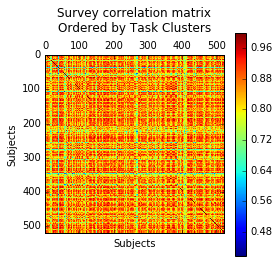

In [217]:
survey_corrmat_ordered_task = survey_corrmat[task_ordering][:, task_ordering]
plt.colorbar(plt.matshow(survey_corrmat_ordered_task))
plt.xlabel('Subjects')
plt.ylabel('Subjects')
plt.title('Survey correlation matrix\nOrdered by Task Clusters', y=1.1)

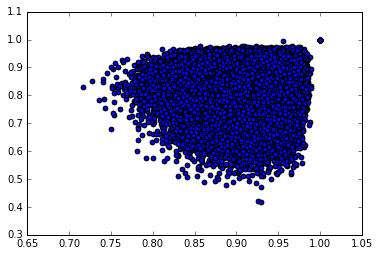

In [203]:
plt.scatter(task_corrmat, survey_corrmat)

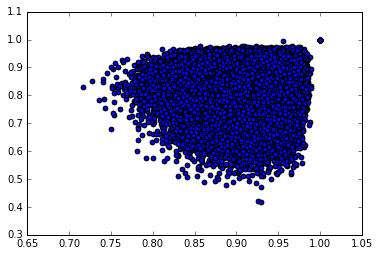

In [204]:
plt.scatter(task_corrmat.flatten(), survey_corrmat.flatten())

In [205]:
task_corrmat_flat = squareform(task_corrmat)
survey_corrmat_flat = squareform(survey_corrmat)

ValueError: Distance matrix 'X' must be symmetric.

In [206]:
task_corrmat - task_corrmat.T


array([[ 0.00000000e+00, -1.11022302e-16,  0.00000000e+00, ...,
         0.00000000e+00,  1.11022302e-16,  1.11022302e-16],
       [ 1.11022302e-16,  0.00000000e+00,  1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16,  0.00000000e+00, ...,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00, -1.11022302e-16],
       [-1.11022302e-16,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.11022302e-16],
       [-1.11022302e-16,  0.00000000e+00,  0.00000000e+00, ...,
         1.11022302e-16,  1.11022302e-16,  0.00000000e+00]])

In [207]:
squareform?

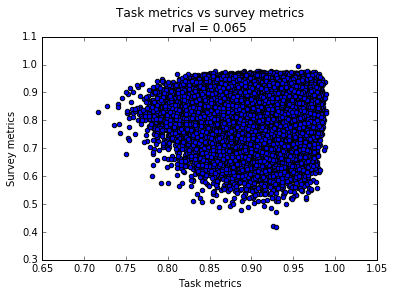

In [227]:
task_corrmat_flat = squareform(task_corrmat, checks=False)
survey_corrmat_flat = squareform(survey_corrmat, checks=False)

rval = stats.pearsonr(task_corrmat_flat, survey_corrmat_flat)[0]

plt.scatter(task_corrmat_flat, survey_corrmat_flat)
plt.xlabel('Task metrics')
plt.ylabel('Survey metrics')
plt.title('Task metrics vs survey metrics\nrval = %.3f' % rval)

In [258]:
health_df = pd.read_csv(os.path.join(sro_path, 'health_ordinal.csv'))

In [259]:
health_df

,Unnamed: 0,Nervous,Hopeless,RestlessFidgety,Depressed,EverythingIsEffort,Worthless,Last30DaysUsual,DaysLostLastMonth,DaysHalfLastMonth,DoctorVisitsLastMonth,DaysPhysicalHealthFeelings,NeurologicalDiagnoses
0,s001,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0
1,s002,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0
2,s003,1.0,2.0,1.0,0.0,1.0,0.0,3.0,NaN,2.0,0.0,0.0,0
3,s004,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,NaN,0.0,0.0,0
4,s005,0.0,1.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,0
5,s006,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0
6,s007,2.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0
7,s008,0.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,1.0,0
8,s009,1.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0
9,s010,1.0,0.0,1.0,0.0,1.0,0.0,3.0,4.0,3.0,0.0,3.0,0


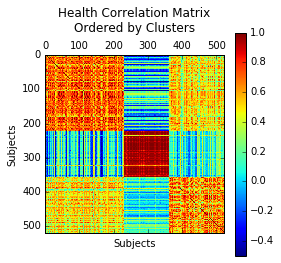

In [271]:
health_corrmat = stats.spearmanr(health_df, 
                                 axis=1, 
                                 nan_policy='omit').correlation

model = AffinityPropagation(damping=0.90, 
                            preference=-5, 
                            affinity='precomputed')
health_clusters = model.fit_predict(health_corrmat)
health_ordering = health_clusters.argsort()
health_corrmat_ordered = health_corrmat[health_ordering][:, 
                                                         health_ordering]
plt.colorbar(plt.matshow(health_corrmat_ordered))
plt.xlabel('Subjects')
plt.ylabel('Subjects')
plt.title('Health Correlation Matrix\nOrdered by Clusters', y=1.1)

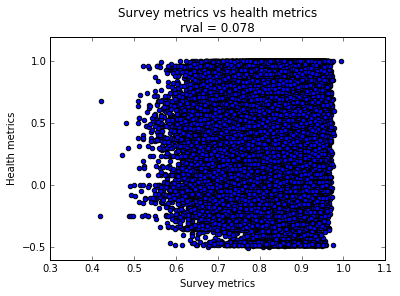

In [261]:
health_corrmat_flat = squareform(health_corrmat, checks=False)

rval = stats.pearsonr(survey_corrmat_flat, health_corrmat_flat)[0]

plt.scatter(survey_corrmat_flat, health_corrmat_flat)
plt.xlabel('Survey metrics')
plt.ylabel('Health metrics')
plt.title('Survey metrics vs health metrics\nrval = %.3f' % rval)

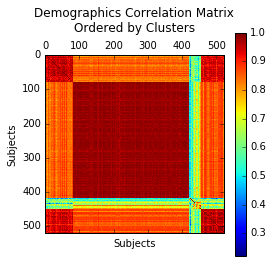

In [277]:
demographics_df = pd.read_csv(os.path.join(sro_path, 'demographics.csv'))
demographics_corrmat = stats.spearmanr(demographics_df, 
                                 axis=1, 
                                 nan_policy='omit').correlation

model = AffinityPropagation(preference=0, 
                            affinity='precomputed')
demographics_clusters = model.fit_predict(demographics_corrmat)
demographics_ordering = demographics_clusters.argsort()
demographics_corrmat_ordered = demographics_corrmat[demographics_ordering][:, demographics_ordering]
plt.colorbar(plt.matshow(demographics_corrmat_ordered))
plt.xlabel('Subjects')
plt.ylabel('Subjects')
plt.title('Demographics Correlation Matrix\nOrdered by Clusters', y=1.1)

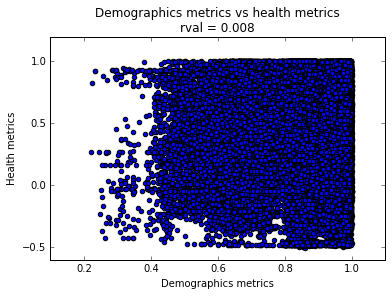

In [263]:
demographics_corrmat_flat = squareform(demographics_corrmat, checks=False)

rval = stats.pearsonr(demographics_corrmat_flat, 
                      health_corrmat_flat)[0]

plt.scatter(demographics_corrmat_flat, 
            health_corrmat_flat)
plt.xlabel('Demographics metrics')
plt.ylabel('Health metrics')
plt.title('Demographics metrics vs health metrics\nrval = %.3f' % rval)